In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path

In [2]:
config = tf.compat.v1.ConfigProto(gpu_options=tf.compat.v1.GPUOptions(
                                    per_process_gpu_memory_fraction=0.8)
                                  )
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [3]:
path = Path().resolve()

df_train = pd.read_csv(path / 'Google_Stock_Price_Train.csv', thousands=',')
print(df_train)

            Date    Open    High     Low   Close    Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7380500
1       1/4/2012  331.27  333.87  329.08  666.45   5749400
2       1/5/2012  329.83  330.75  326.89  657.21   6590300
3       1/6/2012  328.34  328.77  323.68  648.24   5405900
4       1/9/2012  322.04  322.29  309.46  620.76  11688800
...          ...     ...     ...     ...     ...       ...
1253  12/23/2016  790.90  792.74  787.28  789.91    623400
1254  12/27/2016  790.68  797.86  787.66  791.55    789100
1255  12/28/2016  793.70  794.23  783.20  785.05   1153800
1256  12/29/2016  783.33  785.93  778.92  782.79    744300
1257  12/30/2016  782.75  782.78  770.41  771.82   1770000

[1258 rows x 6 columns]


In [4]:
training_set = df_train[['Open']]

scaler = MinMaxScaler()

training_set = scaler.fit_transform(training_set)

In [5]:
print(training_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [6]:
X_train = []
y_train = []

timestep = 60

for i in range(timestep, len(training_set)):
    X_train.append(training_set[i-timestep:i, 0])
    y_train.append(training_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(1198, 60)
[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
(1198,)
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


Da häufig mehr als eine Spalte genutzt wird, oder einzelne Daten in Vektoren aufgespalten werden (z.B. bei Satzerkennung). 
Wird vom LSTM-Layer ein zweidimensionaler Input pro Element erwartet.

In [9]:
X_train = X_train.reshape(-1, 60, 1)

print(X_train.shape)
print(X_train)

(1198, 60, 1)
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


#### Model bauen

In [10]:
model = Sequential()

model.add(LSTM(64, activation='relu',
               return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.3))

model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['acc', 'mse'])

In [11]:
stockmodel = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
38/38 [==============================] - 12s 326ms/step - loss: 0.0798 - acc: 8.3472e-04 - mse: 0.0798
Epoch 2/50
38/38 [==============================] - 12s 314ms/step - loss: 0.0126 - acc: 0.0017 - mse: 0.0126
Epoch 3/50
38/38 [==============================] - 12s 320ms/step - loss: 0.0104 - acc: 0.0017 - mse: 0.0104
Epoch 4/50
38/38 [==============================] - 12s 323ms/step - loss: 0.0081 - acc: 0.0017 - mse: 0.0081
Epoch 5/50
38/38 [==============================] - 12s 325ms/step - loss: 0.0076 - acc: 0.0017 - mse: 0.0076
Epoch 6/50
38/38 [==============================] - 12s 317ms/step - loss: 0.0076 - acc: 0.0017 - mse: 0.0076
Epoch 7/50
38/38 [==============================] - 12s 318ms/step - loss: 0.0067 - acc: 0.0017 - mse: 0.0067
Epoch 8/50
38/38 [==============================] - 12s 326ms/step - loss: 0.0075 - acc: 0.0017 - mse: 0.0075
Epoch 9/50
38/38 [==============================] - 12s 323ms/step - loss: 0.0064 - acc: 0.0017 - mse: 0.0064
Epoch 

In [12]:
print(stockmodel.history['acc'])
print(stockmodel.history['mse'])

[0.000834724516607821, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.001669449033215642, 0.0016694

[]

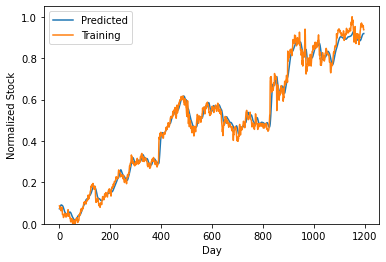

In [15]:
y_pred = model.predict(X_train)

plt.plot(y_pred, label='Predicted')
plt.plot(y_train, label='Training')
plt.ylim(0)
plt.legend()
plt.xlabel('Day')
plt.ylabel('Normalized Stock')
plt.plot()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 64)            16896     
_________________________________________________________________
dropout (Dropout)            (None, 60, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 64)            33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

#### Testdaten

In [17]:
path = Path().resolve()

df_test = pd.read_csv(path / 'Google_Stock_Price_Test.csv', thousands=',')
print(df_test)

         Date    Open    High     Low   Close   Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1657300
1    1/4/2017  788.36  791.34  783.16  786.90  1073000
2    1/5/2017  786.08  794.48  785.02  794.02  1335200
3    1/6/2017  795.26  807.90  792.20  806.15  1640200
4    1/9/2017  806.40  809.97  802.83  806.65  1272400
5   1/10/2017  807.86  809.13  803.51  804.79  1176800
6   1/11/2017  805.00  808.15  801.37  807.91  1065900
7   1/12/2017  807.14  807.39  799.17  806.36  1353100
8   1/13/2017  807.48  811.22  806.69  807.88  1099200
9   1/17/2017  807.08  807.14  800.37  804.61  1362100
10  1/18/2017  805.81  806.21  800.99  806.07  1294400
11  1/19/2017  805.12  809.48  801.80  802.17   919300
12  1/20/2017  806.91  806.91  801.69  805.02  1670000
13  1/23/2017  807.25  820.87  803.74  819.31  1963600
14  1/24/2017  822.30  825.90  817.82  823.87  1474000
15  1/25/2017  829.62  835.77  825.06  835.67  1494500
16  1/26/2017  837.81  838.00  827.01  832.15  2973900
17  1/27/2

In [23]:
test_data = pd.concat((df_train['Open'][-60:], df_test['Open']), axis=0)
test_data = test_data.values.reshape(-1, 1)
test_data_n = scaler.transform(test_data)

X_test = []
for i in range(timestep, len(test_data)):
    X_test.append(test_data_n[i-timestep:i, 0])
X_test = np.array(X_test)

X_test = X_test.reshape(-1, 60, 1)

print(X_test.shape)
print(X_test)

(20, 60, 1)
[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [25]:
y_pred2 = model.predict(X_test)
# print(y_pred2)
y_pred2_real = scaler.inverse_transform(y_pred2)
print(y_pred2_real)

[[772.8025 ]
 [772.2193 ]
 [771.7179 ]
 [771.296  ]
 [771.2153 ]
 [771.6633 ]
 [772.5527 ]
 [773.65125]
 [774.86053]
 [776.08203]
 [777.2307 ]
 [778.2308 ]
 [779.0496 ]
 [779.7375 ]
 [780.3196 ]
 [781.1611 ]
 [782.39636]
 [784.07086]
 [785.958  ]
 [787.435  ]]


[]

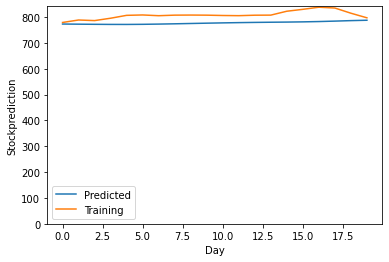

In [26]:
plt.plot(y_pred2_real, label='Predicted')
plt.plot(df_test['Open'], label='Training')
plt.ylim(0)
plt.legend()
plt.xlabel('Day')
plt.ylabel('Stockprediction')
plt.plot()

In [32]:
total = pd.concat((df_train['Open'], df_test['Open']), axis=0)

total_n = scaler.transform(total.values.reshape(-1, 1))

X_total = []
for i in range(timestep, len(total_n)):
    X_total.append(total_n[i - timestep:i, 0])
X_total = np.array(X_total)
X_total = X_total.reshape(-1, 60, 1)
X_total

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [36]:
y_total = model.predict(X_total)
y_true = total_n[60:]

[]

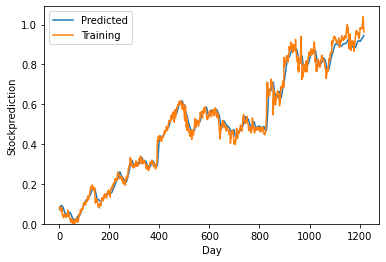

In [37]:
plt.plot(y_total, label='Predicted')
plt.plot(y_true, label='Training')
plt.ylim(0)
plt.legend()
plt.xlabel('Day')
plt.ylabel('Stockprediction')
plt.plot()